# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [14]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_color, y_train = train['features'], train['labels']
X_test_color, y_test = test['features'], test['labels']

print ("Data loading finished!")

Data loading finished!


In [15]:
### To start off let's do a basic data summary.
import numpy as np

n_train = len(X_train_color)

n_test = len(X_test_color)

image_shape = X_train_color[0].shape
 
n_classes = np.max(y_test) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


32261   31
21226   13
21757   13


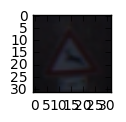

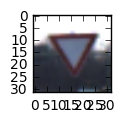

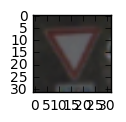

In [16]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display_random(data, n, label, gray):
    for i in range(n):
        index = random.randint(0, len(data))
        image = data[index].squeeze()

        plt.figure(figsize=(1,1))
        if gray == True: 
            plt.imshow(image, cmap='gray')
        else: 
            plt.imshow(image)
        print (index, ' ' , y_train[index])

display_random(X_train_color, 3, y_train, False)
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Finished processing train set
Finished processing test set
Train size  27446
Validation size 11763
19478   11
5732   15
13141   11


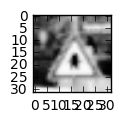

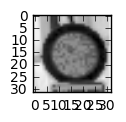

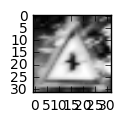

In [17]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
import cv2
import numpy as np

"copy/inspired from campushippo build a tensor flow traffic sign classifier at 95%"
def preprocess(data):
    images = np.ndarray((data.shape[0], 32, 32, 1), dtype = np.uint8)
    for i, image in enumerate(data):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.equalizeHist(image)
        image = np.expand_dims(image, axis = 2)
        images[i] = image
        
    return images

X_train = preprocess(X_train_color) #store in another set otherwise would not be able to rerun color to gray conversion
print ('Finished processing train set')
X_test = preprocess(X_test_color)
print ('Finished processing test set')
#validation provided with new version, no split needed
#split train set into train and validation (to optimize parameters tuning and prevent overfitting)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=55)

print ("Train size ", len(X_train))
print ("Validation size", len(X_validation))

display_random(X_train, 3, y_train, True) #display random data to verify conversion is successful



### Question 1 



** We need to shuffle the training data because...? 
Do we need to convert image to gray scale? yes (From the Traffic Sign recognition with multi-scale convolutional networks, it seems to yield better result); Lenet also uses scale **

In [18]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# TODO: need to split train set into train and validation? 
#1. Convert color images into grayscale images (color not needed, network runs slower)
#2. 


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [19]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten 

EPOCHS = 20 
BATCH_SIZE = 128

#"copy" Lenet solution 

def LeNet(x):
    #arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    kernel_size = 5
    #Layer 1: Convolutional. Input = 32x32x1 * (kernel =5 ) -> Output = 28 x 28 x 6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(kernel_size, kernel_size, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1, 1, 1, 1], padding='VALID') + conv1_b
    
    #Activation with Relu function
    conv1 = tf.nn.relu(conv1)
    
    #Pooling/subsampling layer1 Input = 28x28x6 -> output = 14x14x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Layer 2: convolutional. Output = 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #Activation layer 2
    conv2 = tf.nn.relu(conv2)
    
    #Pooling/Subsampling layer 2
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 1, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #flatten (5x5x16) -> 400
    fc0 = flatten(conv2)
    
    #layer 3: fully connected. Input = 400 -> output = 120; TODO: check what does it mean by fully connected neural network
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    #activation 
    fc1 = tf.nn.relu(fc1)
    
    #layer 4: fully connected Input = 120 -> output = 84?
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
        
    fc2 = tf.nn.relu(fc2)
    
    #layer 5: fully connected. Input = 84. Output = n_classes (43)
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
    
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y , n_classes)

print ("DONE")


DONE


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


** Use Lenet architecture**
** TODO elaborate **

In [20]:
### Train your model here.
### Feel free to use as many code cells as needed.

rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

print ("Done training LeNet pipeline")

#model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data): 
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
                
    num_examples = len(X_train)
    
    print("Training....")
    
    for i in range(EPOCHS): 
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict = {x: batch_x, y: batch_y})
        
        
        #validation_accuracy = evaluate(X_validation, y_validation)
        #FIXME: SHOULD USE X_VALIDATION BUT NO VALIDATION SET YET; TODO SPLIT TEST SET TO
        #VALIDATION SET
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, './lenet')
    print("Model saved")



Done training LeNet pipeline
Training....
EPOCH 1 ...
Validation accuracy = 0.698

EPOCH 2 ...
Validation accuracy = 0.822

EPOCH 3 ...
Validation accuracy = 0.863

EPOCH 4 ...
Validation accuracy = 0.895

EPOCH 5 ...
Validation accuracy = 0.911

EPOCH 6 ...
Validation accuracy = 0.915

EPOCH 7 ...
Validation accuracy = 0.920

EPOCH 8 ...
Validation accuracy = 0.929

EPOCH 9 ...
Validation accuracy = 0.920

EPOCH 10 ...
Validation accuracy = 0.929

EPOCH 11 ...
Validation accuracy = 0.936

EPOCH 12 ...
Validation accuracy = 0.938

EPOCH 13 ...
Validation accuracy = 0.936

EPOCH 14 ...
Validation accuracy = 0.933

EPOCH 15 ...
Validation accuracy = 0.938

EPOCH 16 ...
Validation accuracy = 0.936

EPOCH 17 ...
Validation accuracy = 0.933

EPOCH 18 ...
Validation accuracy = 0.935

EPOCH 19 ...
Validation accuracy = 0.949

EPOCH 20 ...
Validation accuracy = 0.936

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


** TODO **
** Get to 87.6% accuracy (EPOCH 18) --> some model tuning needed ()
After splitting to train and validation set, validation accuracy increase to 94.9% (EPOCH 19)**


### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [22]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print ("Test accuracy = {:.3f}".format(test_accuracy))


Test accuracy = 0.846


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.



### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.